In [392]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
import pandas

# Leo los datos

In [360]:
#Defino M a partir de los datos en el .csv
M = pandas.read_csv('catalogo.csv')

In [393]:
M.keys()

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im

# Limpio los datos

In [362]:
f1 = ~np.isnan(M['eccentricity'])
f2 = ~np.isnan(M['orbital_period'])

In [363]:
f1.values

array([ True, False,  True, ...,  True,  True, False])

In [366]:
ff = []
for ff1, ff2 in zip(f1.values, f2.values):
    ff.append(ff1 and ff2)

In [367]:
Mss = M[ff]

In [368]:
P = Mss['orbital_period']

In [369]:
e = Mss['eccentricity']

In [370]:
e

0       0.23100
2       0.08000
3       0.00000
4       0.36900
5       0.68900
         ...   
4211    0.03100
4212    0.01186
4213    0.24450
4214    0.31600
4215    0.00536
Name: eccentricity, Length: 1606, dtype: float64

In [371]:
range_e = e.values < 1.

In [372]:
range_P = P.values < 1000.

In [373]:
ff = []
for ff1, ff2 in zip(range_e, range_P):
    ff.append(ff1 and ff2)

In [374]:
P = P[ff]

In [375]:
e = e[ff]

In [394]:
P

0       326.03000
2       516.22000
3       185.84000
5       799.50000
6       993.30000
          ...    
4209     20.00000
4210     49.41000
4211    305.50000
4212      4.61711
4213    240.93700
Name: orbital_period, Length: 1346, dtype: float64

# Visualizo

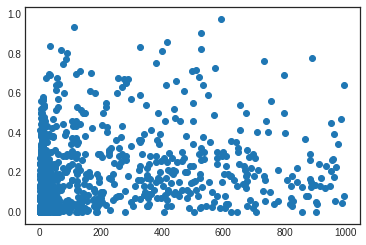

In [377]:
plt.scatter(P,e)
plt.show()

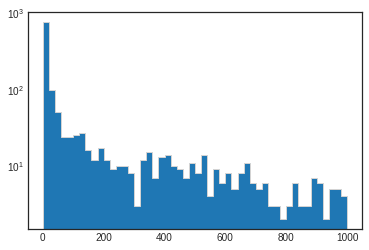

In [378]:
#Histograma períodos reduje el rango despreciando las pocas frecuencias
plt.hist(P, edgecolor='lightgrey', bins=50, histtype='stepfilled', range=(0.03, 1000));
plt.yscale('log')

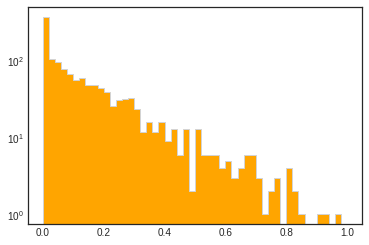

In [379]:
#Histograma excetricidades reduje el rango despreciando las pocas frecuencias
plt.hist(e, edgecolor='lightgrey', bins=50, color='orange', histtype='stepfilled', range=(0, 1));
plt.yscale('log')

In [380]:
import matplotlib.colors as colors

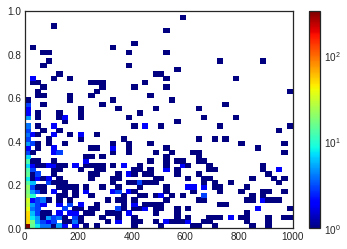

In [381]:
#Ahora el histograma 2D, limitando mucho el rango.
plt.hist2d(P, e, bins=(50, 50), range=[[0, 1000], [0, 1]],  cmap='jet', norm=colors.LogNorm());
plt.colorbar()


In [382]:
lP =np.log10(P) #quiero el log del periodo

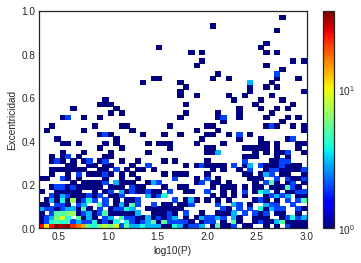

In [395]:
plt.hist2d(lP, e, bins=(50, 50), range=[[np.log10(2), np.log10(1000)], [0, 1]],  cmap='jet', norm=colors.LogNorm());
cb = plt.colorbar()
plt.xlabel('log10(P)')
plt.ylabel('Excentricidad')

plt.savefig('hist2dlog.pdf')

### con smoothing

In [384]:
data = np.vstack([lP, e])
kde = gaussian_kde(data)

In [385]:
min_lP = min(lP)
max_lP = max(lP)

In [386]:
min_e = min(e)
max_e = max(e)

In [389]:
print([min_e, max_e, min_lP, max_lP])

[0.0, 0.97, -1.154901959985743, 2.9979976364080043]


In [396]:
xgrid = np.logspace(min_lP, max_lP, 100)
ygrid = np.linspace(min_e, max_e, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

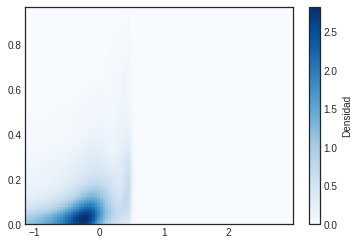

In [397]:
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[min_lP, max_lP, min_e, max_e],\
           cmap='Blues')
plt.xlabel()
cb = plt.colorbar()
cb.set_label('Densidad')

In [14]:
from scipy.stats import gaussian_kde

lP =np.log10(P) #quiero el log del periodo
le =np.log10(e) #quiero el log del periodo
lP=lP.astype(float)         #Identificar al vector P como vector de numeros. identifica nan
le=le.astype(float)

<ipython-input-14-3b1331aa0226>:4: RuntimeWarning: divide by zero encountered in log10
  le =np.log10(e) #quiero el log del periodo


In [12]:
data = np.vstack([lP, le])
kde = gaussian_kde(data)

<ipython-input-12-fae6485f6292>:4: RuntimeWarning: divide by zero encountered in log10
  le =np.log10(e) #quiero el log del periodo


ValueError: array must not contain infs or NaNs

In [ ]:
xgrid = np.logspace(1, 5, 10)
ygrid = np.linspace(0, 1, 10)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[0, 5, 0, 1], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Densidad')


In [23]:
#Veo si en verdad hay nan's
P

array([3.260300e+02, 7.300000e+05, 5.162200e+02, ..., 1.281439e+03,
       3.848860e+03,          nan])

In [25]:
lP

array([2.51325756, 5.86332286, 2.71283483, ..., 3.10769794, 3.58533211,
              nan])

In [ ]:
#Si los hay todavía...